<a href="https://colab.research.google.com/github/ncgomez17/Deep_Learning/blob/master/Keras/Aprendiendo_Keras3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este ejemplo vamos a crear un modelo Keras con el conjunto de datos Fashion-MNIST.Este se trata de un conjunto de imágenes de los artículos de Zalando.Las imágenes están en escalas de grises en 10 categorías.

In [19]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


In [20]:
## Cargamos los datos
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

La carga de datos anterior devuelve cuatro matrices NumPy.Dado que los nombres de clase no se incluyen con el conjunto de datos,podemos crear una lista con ellos para usarlos más adelante al visualizar las imágenes.

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',
               'Ankle boot']
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images /255.0

In [22]:
##comprobamos que los datos tienen la forma que esperamos
print("train_images.shape:",train_images.shape)
print("len(train_labels)",len(train_labels))
print("test_images.shape:",test_images.shape)
print("len(test_labels):",len(test_labels))
train_labels

train_images.shape: (60000, 28, 28)
len(train_labels) 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

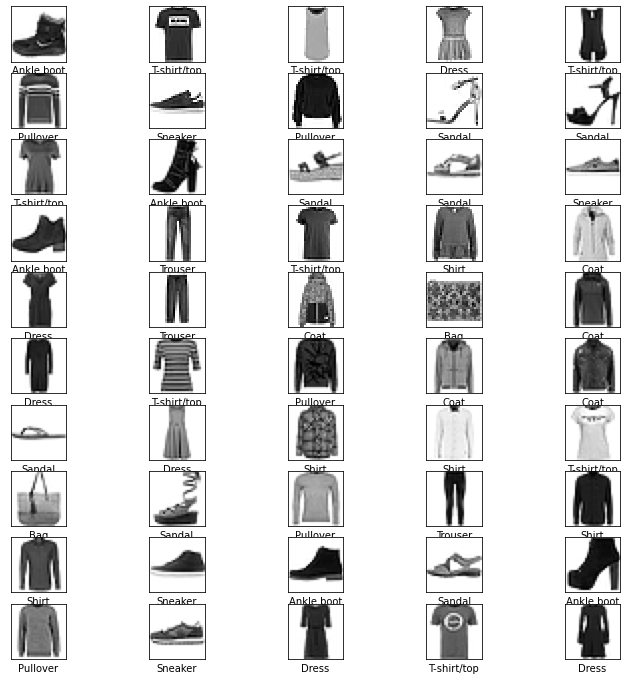

In [23]:
## mostramos las figuras
plt.figure(figsize=(12,12))
for i in range(50):
  plt.subplot(10,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
## Ahora definiremos el modelo
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [25]:
## Configuraremos el modelo
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Y ahora entrenamos el modelo
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0204 - accuracy: 0.3297
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2942 - accuracy: 0.6429
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0223 - accuracy: 0.6910
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8774 - accuracy: 0.7223
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7843 - accuracy: 0.7521


Como podemos observar este modelo alcanza una precisión de aproximadamante 75% pasando por la red neuronal 5 veces(**epochs**)
Lo siguiente será evaluar el modelo:

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:',test_acc)

313/313 [==============================] - 0s 911us/step - loss: 0.7531 - accuracy: 0.7547
Test accuracy: 0.7547000050544739


Practicamente es la misma precisión que en los datos de entrenamiento.

Lo siguiente que haremos es usar el modelo para hacer prediciones.

In [28]:
predictions = model.predict(test_images)
##En predictions de ha almacenado la predicción de la etiqueta para cada imagen en el conjunto de prueba
predictions[5]
##miramos si los resultados obtenidos del objeto que escogimos son correctos
print(np.argmax(predictions[5]))
print(test_labels[5])

1
1


In [29]:
##Mostraremos graficamente cómo de bien o de mal se comporta el modelo,la función está extraida del tutorial de TensorFlow
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

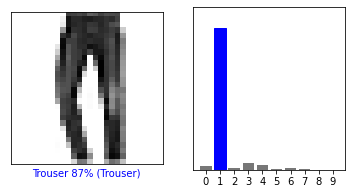

In [31]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i], test_labels)
plt.show()

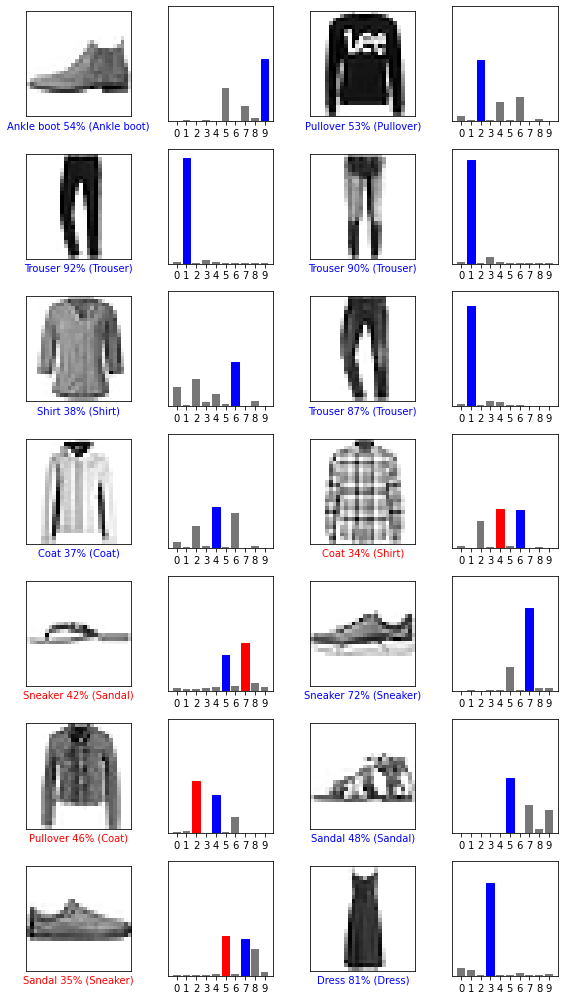

In [32]:
## Ahora visualizaremos varias imagenes con sus predicciones
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i], test_labels, test_images)
  plt.subplot(num_rows,2*num_cols, 2*i+2)
  plot_value_array(i,predictions[i], test_labels)
plt.tight_layout()
plt.show()

Podemos observar que la precisión obtenida dista bastante de los ejemplos anteriores que hemos realizado con Keras.Por lo que ahora probaremos a cambiar un poco el modelo para ver si podemos conseguir mejores resultados.

In [33]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

## Configuraremos el modelo,en este caso el optimizador será diferente
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Y ahora entrenamos el modelo
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:',test_acc)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4100 - accuracy: 0.6051
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6043 - accuracy: 0.8156
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4934 - accuracy: 0.8369
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.45

Observamos que los resultados obtenidos han mejorado bastante al cambiar solo el optimizador,casi un 10% mejor.